In [1]:
# notebook last tested with abtem version 1.0.0beta6

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.dft import GPAWPotential
from abtem.transfer import CTF
from abtem.plot import show_atoms

from ase.io import read
from gpaw import GPAW

current version: 1.0.0beta5


c:\users\jacob\pycharmprojects\abtem\abtem\dft.py:20: UserWarning: This functionality of abTEM requires GPAW, see https://wiki.fysik.dtu.dk/gpaw/.
  warnings.warn('This functionality of abTEM requires GPAW, see https://wiki.fysik.dtu.dk/gpaw/.')


ModuleNotFoundError: No module named 'gpaw'

# HRTEM simulation with GPAW potential

In [7]:
# Need converged calculator, this would usually be imported

atoms = read('data/hexagonal_graphene.cif')

gpaw = GPAW(h=.1, txt=None, kpts=(3,3,1))
atoms.calc = gpaw
atoms.get_potential_energy()

-19.68456129991716

In [9]:
potential = GPAWPotential(gpaw, sampling=.03).build()

In [10]:
wave = PlaneWave(
    energy=60e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

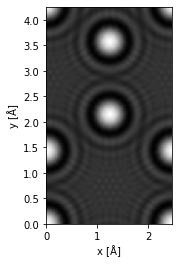

In [11]:
exit_wave.show()

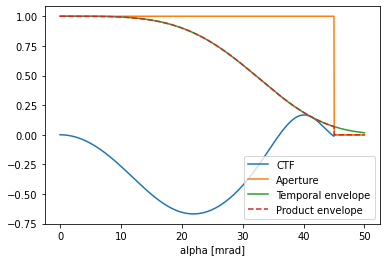

In [12]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x129c2fba8>)

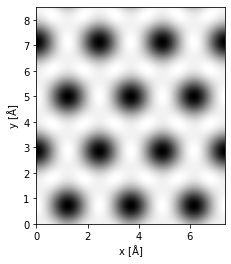

In [15]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().tile((3,2)).show()

In [16]:
# get image intensity as array

image_wave.intensity().array

array([[1.0293672, 1.0293758, 1.0294142, ..., 1.0293711, 1.0293825,
        1.0293748],
       [1.0293794, 1.0293803, 1.0294108, ..., 1.0294037, 1.0294087,
        1.0293944],
       [1.0294065, 1.0293841, 1.0293906, ..., 1.0294935, 1.0294787,
        1.0294437],
       ...,
       [1.0294211, 1.0293592, 1.0293238, ..., 1.0296146, 1.0295662,
        1.0294957],
       [1.0293906, 1.0293674, 1.0293732, ..., 1.0294793, 1.0294638,
        1.0294281],
       [1.0293713, 1.029372 , 1.0294023, ..., 1.0293967, 1.0294012,
        1.0293865]], dtype=float32)